**THÊM THƯ VIỆN**

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_diabetes, load_wine, load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB



from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.metrics import precision_recall_fscore_support

from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_classification

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split


**Load dữ liệu có sẵn**

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []

**Chia tập dữ liệu thành bộ Train và Test**

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=1/3, random_state=10)

**Huấn luyện mô hình KNN**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_Train, Y_Train)
y_pred_knn = knn_classifier.predict(X_Test)
accuracy_knn = accuracy_score(Y_Test,y_pred_knn )
print("Do chinh xac cua KNN:", accuracy_knn)

Do chinh xac cua KNN: 0.96


**Huấn luận mô hình Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(X_Train, Y_Train)
y_pred_dt = decision_tree.predict(X_Test)
accuracy_dt = accuracy_score(Y_Test,y_pred_dt )
print("Do chinh xac cua Decision Tree:", accuracy_dt)

Do chinh xac cua Decision Tree: 0.9


**Huấn luyện mô hình Bagging**

In [ ]:
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
random_state=42)
bagging_classifier.fit(X_Train, Y_Train)
y_pred_bagging = bagging_classifier.predict(X_Test)
accuracy_bagging = accuracy_score(Y_Test,y_pred_bagging )
print("Do chinh xac cua Bagging:", accuracy_bagging)

Do chinh xac cua Bagging: 0.94


**AdaBoost**

In [ ]:
adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100,
random_state=42)
adaboost_classifier.fit(X_Train, Y_Train)
y_pred_adaboost = adaboost_classifier.predict(X_Test)
accuracy_adaboost = accuracy_score(Y_Test,y_pred_adaboost )
print("Do chinh xac cua AdaBoost:", accuracy_adaboost)

Do chinh xac cua AdaBoost: 0.96


**Random Forest**

In [ ]:
random_forest = RandomForestClassifier( n_estimators=100,random_state=42)
random_forest.fit(X_Train, Y_Train)
y_pred_rf = random_forest.predict(X_Test)
accuracy_rf = accuracy_score(Y_Test,y_pred_rf )
print("Do chinh xac cua Random Forest:", accuracy_rf)

Do chinh xac cua Random Forest: 0.96


**Huấn luyện mô hình sử dụng Naive Bayesian**

In [ ]:
bayesian = GaussianNB()
bayesian.fit(X_Train, Y_Train)
y_pred_by = bayesian.predict(X_Test)
accuracy_by = accuracy_score(Y_Test,y_pred_by )
print("Do chinh xac cua Naive Bayesian:", accuracy_by)


Do chinh xac cua Naive Bayesian: 0.94


**Dự đoán kết quả huyến luyện**

In [ ]:
predicted=model.predict([X_Test[4]])
print("Actual Value:", Y_Test[4])
print("Predicted Value:",predicted[0])


Actual Value: 0
Predicted Value: 0


In [ ]:
# Du doan (TEST) .predict()

Y_DuDoan = model.predict(X_Test)
print("Ket qua du doan:", Y_DuDoan)
print("Ket qua thuc te:", Y_Test)

Ket qua du doan: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2]
Ket qua thuc te: [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2]


**Đánh giá mô hình**

In [ ]:
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [ ]:
Y_Pred=model.predict(X_Test)

accuray = accuracy_score(Y_Pred, Y_Test)
f1 = f1_score(Y_Pred, Y_Test, average="weighted")

print("Accuracy:",accuray )
print("F1 score:",f1 )

Accuracy: 0.98
F1 score: 0.97996723996724


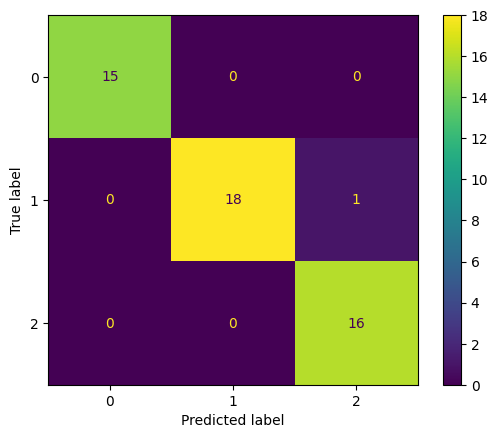

In [ ]:
labels = [0,1,2]
cm=confusion_matrix(Y_Test,Y_Pred,labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

**Huấn luyện mô hình KNN 10 lần**

In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for k_neighbor in range(1,21):
    for each in range(1,11):
      combined = list(zip(X, y))
      random.shuffle(combined)
      dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
      X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

      model = KNeighborsClassifier(k_neighbor)
      model.fit(X_Train, Y_Train)
      Y_Pred = model.predict(X_Test)

      Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
      Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
      Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
      Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100

      avg_acc.append(Ketqua_Dochinhxac)
      avg_prec.append(Ketqua_Precision)
      avg_rec.append(Ketqua_Recall)
      avg_f1.append(Ketqua_F1)

    acc = statistics.mean(avg_acc)
    prec = statistics.mean(avg_prec)
    rec = statistics.mean(avg_rec)
    f1 = statistics.mean(avg_f1)

    print("No.{}: Acc:{} - Prec:{} - Rec:{} - F1:{}".format(k_neighbor,acc,prec,rec,f1))



No.1: Acc:95.0 - Prec:95.12656051894442 - Rec:95.0 - F1:95.00439304891637
No.2: Acc:94.1 - Prec:94.63598673153471 - Rec:94.1 - F1:94.0859520737968
No.3: Acc:94.6 - Prec:95.02063832784576 - Rec:94.6 - F1:94.59052394694555
No.4: Acc:94.8 - Prec:95.17946864487422 - Rec:94.8 - F1:94.79323836985756
No.5: Acc:95.04 - Prec:95.38661081446932 - Rec:95.04 - F1:95.03363077472133
No.6: Acc:95.06666666666666 - Prec:95.46927660096468 - Rec:95.06666666666666 - F1:95.06479818535567
No.7: Acc:95.11428571428571 - Prec:95.52704228134635 - Rec:95.11428571428571 - F1:95.11213835989732
No.8: Acc:95.425 - Prec:95.80830180081786 - Rec:95.425 - F1:95.42370062805388
No.9: Acc:95.26666666666667 - Prec:95.69958681703574 - Rec:95.26666666666667 - F1:95.26692049193875
No.10: Acc:95.14 - Prec:95.64776597238331 - Rec:95.14 - F1:95.14210963099967
No.11: Acc:95.2 - Prec:95.67597256814862 - Rec:95.2 - F1:95.20189827689825
No.12: Acc:95.23333333333333 - Prec:95.69466058398373 - Rec:95.23333333333333 - F1:95.2358656298360

**Huấn luyệnn mô hình Bayesian 10 lần**

In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = GaussianNB()
  model.fit(X_Train, Y_Train)
  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:94.44444444444444 - Prec:94.82627908154224 - Rec:94.44444444444444 - F1:94.38867873508674


**Huấn luyện mô hình Decision Tree 10 lần**

In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = DecisionTreeClassifier(random_state=40, max_depth=3)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:94.66666666666667 - Prec:95.19308661086266 - Rec:94.66666666666667 - F1:94.67433016999202


**`Huấn luyên mô hình Bagging 10 lần`**

In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=45,
  random_state=125)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:95.33333333333333 - Prec:95.72082408189219 - Rec:95.33333333333333 - F1:95.32643859527832


**Huấn luyên mô hình AdaBoost 10 lần**

In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100,
  random_state=75)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:93.33333333333333 - Prec:0.9405521313338651 - Rec:0.9333333333333333 - F1:0.9338129155504958


****`Huấn luyên mô hình Random Forest lần`****


In [ ]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = RandomForestClassifier( n_estimators=100,random_state=150, max_depth=3)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:94.0 - Prec:0.9428951009717264 - Rec:0.94 - F1:0.9399048528033017


**SVM**

In [ ]:
import random
from sklearn.svm import SVC
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
for each in range(1,10):
  combined = list(zip(X, y))
  random.shuffle(combined)
  dulieu_X_shuffled, dulieu_Y_shuffled=zip(*combined)
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(dulieu_X_shuffled,dulieu_Y_shuffled, test_size=1/3, random_state=125 )

  model = SVC( C=10000,gamma=0.001 )
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))


Acc:94.44444444444444 - Prec:0.9510265694294837 - Rec:0.9444444444444444 - F1:0.9439731211350831
